# 2. 퍼셉트론
* 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘
* 이 이론은 신경망으로 나아가는 중요한 아이디어

## 2.1 퍼셉트론이란?
* 다수의 신호를 입력받아 하나의 신호로 출력
* 퍼셉트론의 신호는 '흐른다/안흐른다' 또는 '1 / 0'

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" ></script>

<img src="../img/2-1.jpg" width="250"></img>
* <b>그림 2-1</b>
    * \\(x_1\\)과 \\(x_2\\)는 입력 신호, \\(y\\)는 출력신호
    * \\(w_1\\)과 \\(w_2\\)는 가중치(weight)

### 작동 원리

* 입력 신호가 뉴런(그림의 원)에 보내질 때, 각각의 고유한 <b>가중치</b>를 곱함 \\((w_1x_1, w_2x_2)\\)
* 이 신호들의 총 합이 정해진 임계값을 초과하는 경우 1을 출력



\\[ y =
  \begin{cases}
    0  & \quad (w_1 x_1 + w_2 x_2 \leq \theta)\\
    1  & \quad (w_1 x_1 + w_2 x_2 > \theta)\\
  \end{cases}
\\]

* <b>식 2-1</b>
    * 여기서 \\(\theta\\)는 <b>임계값</b>

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

<img src="../img/2-2.jpg" width="350"></img>

+ <b>퍼셉트론 예시</b>
    + \\((w_1, w_2, \theta)\\)
    + (0.5, 0.5, 0.7)
    + (0.5, 0.5, 0.8)
    + (1.0, 1.0, 1.0)

### 2.2.2 NAND 게이트와 OR 게이트

<img src="../img/2-3.jpg" width="350"></img>
<img src="../img/2-4.jpg" width="350"></img>

### 2.3.1 간단한 구현
* 간단한 구현으로, X1과 X2를 인수로 받는 AND함수를 작성

In [1]:
# 매개변수 : x1, x2 +.
def AND(x1, x2):
    # w1, w2 => 가중치1, 2
    #theat => 임계값
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [4]:
print AND(0,0)
print AND(1,0)
print AND(0,1)
print AND(1,1)

0
0
0
1


### 2.3.2 가중치와 편향 도입
* 앞서 구현한 방식을 다른 방식으로 수정
* theta를 bias로 치환

\\[ y =
  \begin{cases}
    0  & \quad (b + w_1 x_1 + w_2 x_2 \leq 0)\\
    1  & \quad (b + w_1 x_1 + w_2 x_2 \geq 0)\\
  \end{cases}
\\]

* 여기에서 \\(b\\)를 <b>편향</b>\\(^{bias} \\)라 함

* 이제 이를 파이선으로 구현

In [3]:
import numpy as np

x = np.array([0,1])       #입력 값 [x1, x2]
w = np.array([0.5, 0.5])  #가중치  [w1, w2]
b = -0.7                  #편향 (bias)

In [4]:
print w*x
print np.sum(w*x)
print np.sum(w*x) + b

[ 0.   0.5]
0.5
-0.2


### 2.3.3 가중치와 편향 구현하기
* 이제 이를 도입한 AND 게이트를 구현

In [5]:
def AND(x1, x2):
    x = np.array([x1, x2])     #입력 값 [x1, x2]
    w = np.array([0.5, 0.5])   #가중치  [w1, w2]
    b = -0.7                   #편향 (bias)
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

* 여기서, 
    * 가중치 (weight)는 각 입력신호가 결과에 주는 영향력(중요도)을 조절
    * 편향 (bias)은 어라마나 쉽게 뉴런(노드)를 활성화 하느냐를 조절

In [8]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7

    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1


In [9]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    else:
        return 1

## 2.4 퍼셉트론의 한계
* 퍼셉드론의 한계를 확인하기 위해, XOR 게이트를 구현

### 2.4.1 도전! XOR 게이트
<img src="../img/2-5.jpg" width="350"></img>

* 퍼셉트론 예시
    * \\((b, w_1, w_2)\\)
    * (-0.5, 1.0, 1.0)

* 이 예시에 대한 퍼셉트론을 식으로 표시하면 다음과 같음

\\[ y =
  \begin{cases}
    0  & \quad (-0.5 + w_1 x_1 + w_2 x_2 \leq 0)\\
    1  & \quad (-0.5 + w_1 x_1 + w_2 x_2 > 0)\\
  \end{cases}
\\]

* 그리고 이를 시각화하면 다음과 같음

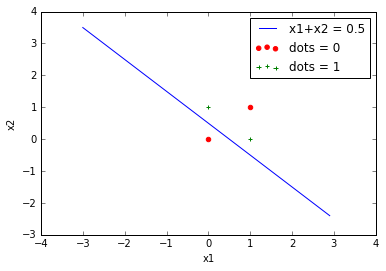

In [18]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#line 용 함수
def func(x1):
    return -x1 +0.5

#line 용 변수
x1 = np.arange(-3,3, 0.1)
x2 = func(x1)

#dot 용 변수
dotx1_zero = np.array([0,1])
dotx2_zero = np.array([0,1])

dotx1_one = np.array([0,1])
dotx2_one = np.array([1,0])

#line 출력
plt.plot(x1, x2, label="x1+x2 = 0.5")
plt.scatter(dotx1_zero, dotx2_zero, marker='o',color='r', label="dots = 0")
plt.scatter(dotx1_one, dotx2_one, marker='+',color='g', label="dots = 1")

#서식
plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()
plt.show()

### 2.4.2 선형과 비선형
* 위 그래프에서, <b>선형</b> 영역으로 분류하는 것은 불가능
* 하지만 <b>비선형</b> 영역으로 분류하는 것은 가능

## 2.5 다층 퍼셉트론이 출동한다면
* 사실 퍼셉트론의 강점은 여러 퍼셉트론으로 '층을 쌓아' <b>다중 퍼셉트론</b>\\(^{mulit-layer perceptron} \\)을 만드는 것
* 그전에 먼저 다른 관점에서 XOR 게이트를 구현
<img src="../img/2-12.jpg" width="750"></img>

In [19]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [20]:
print XOR(0, 0)
print XOR(1, 0)
print XOR(0, 1)
print XOR(1, 1)

0
1
1
0


<img src="../img/2-13.jpg" width="750"></img>

* 이와같은 구조를 다층 퍼셉트론이라 함
* 이 구조의 동작을 자세히 서술하면 다음과 같음
    1. 0층(Input Layer)의 두 뉴런이 입력 신호를 받아 1층(Hidden Layer)로 신호를 보낸다.
    2. 1층의 뉴런이 2층(Output Layer)의 뉴런으로 신호를 보내고, 2층의 뉴런은 이 신호를 바탕으로 y를 출력한다.